# <font style="color:rgb(50,120,229)">Introduction</font>

In this part of the project, we will design 2 instagram-like filter. 

1. Pencil Sketch Filter - This will generate a sketch of the given image as shown in the output below.
1. Cartoon Filter using - This should produce a cartoonified output of the input image.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [4]:
def pencilSketch(image, arguments=0):
    
    ### YOUR CODE HERE

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(3,3),0,0)
    laplacian = cv2.Laplacian(blur, cv2.CV_32F, ksize = 5, 
                            scale = 1, delta = 0)
    #binary thresholding
    ret, output = cv2.threshold(255 - laplacian, 150, 255, cv2.THRESH_BINARY)
    pencilSketchImage = cv2.cvtColor(output, cv2.COLOR_GRAY2BGR)
    return pencilSketchImage

In [3]:
def cartoonify(image, arguments=0):
    
    ### YOUR CODE HERE

    cartoonImage = image.copy()
    pencilSketchImage = pencilSketch(image)
    cartoonImage[pencilSketchImage == 0] = 0 
    

    return cartoonImage

In [5]:
imagePath = "trump.jpg"
image = cv2.imread(imagePath)

cartoonImage = cartoonify(image)
pencilSketchImage = pencilSketch(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


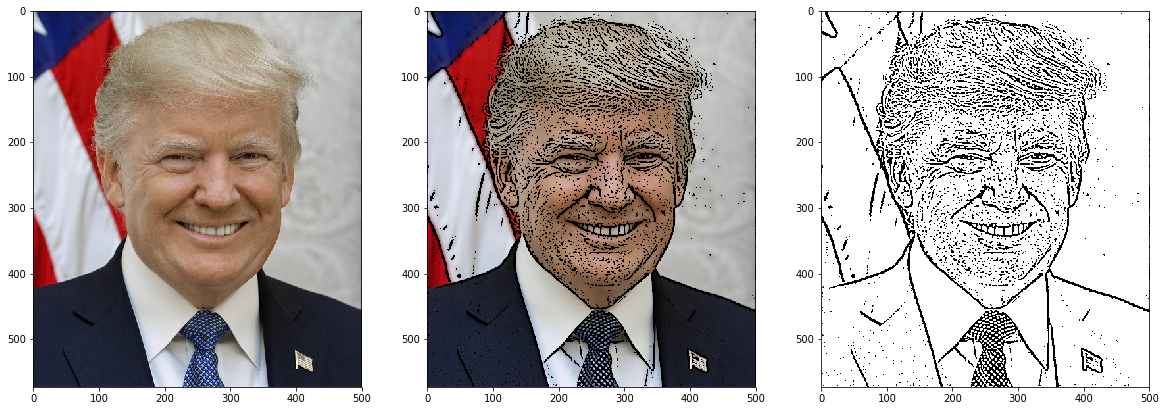

In [6]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(image[:,:,::-1]);
plt.subplot(132);plt.imshow(cartoonImage[:,:,::-1]);
plt.subplot(133);plt.imshow(pencilSketchImage[:,:,::-1]);